In [1]:
import numpy as np
import pandas as pd
from monty.serialization import loadfn, dumpfn
from scipy.stats import skew, pearsonr, spearmanr
import scipy 
import seaborn as sns
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
current_dir = os.getcwd()
src_dir = os.path.join(current_dir, '..', 'src')
sys.path.append(src_dir)
from load_data import *

In [2]:
df_param = param_df()
df_diff = diff_df()
df_one = life_df()
df_rpt = rpt_df()
df_f_info = form_df()
df_electrode_info = electrode_df()

In [3]:
df_all = df_f_info.merge(df_param, on = 'seq_num')
df_all = df_all.merge(df_rpt, on = 'seq_num')
df_all = df_all.merge(df_one, on = 'seq_num')
df_all = df_all.merge(df_diff, on = ['seq_num', 'cycle_index'])
df_all = df_all.merge(df_electrode_info, on = ['seq_num', 'cycle_index'])

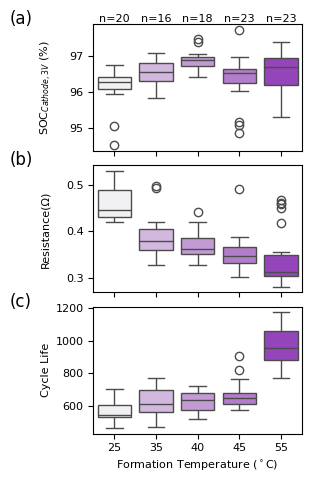

In [4]:
num_rows = 3
num_cols = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize = (8/3*num_cols, 1.5*num_rows), sharex = True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.03)

fontsize = 8

val = 'r_d_0_10s'
cycle = 0
cur_1 = cur_2 = 0.24

df_chosen = df_all[(df_all.cycle_index == cycle)&(df_all.formation_charge_current_1<cur_1)&(df_all.formation_charge_current_2<cur_2)&(df_all[val].notna())]
cm = sns.color_palette("light:darkorchid", as_cmap=True)
sns.boxplot(data=df_chosen,x = 'formation_temperature', y=val, hue='formation_temperature', ax = axs[1], legend = False, palette = cm)
axs[1].set_xlabel('Formation Temperature ($^\circ$C)', fontsize = fontsize)
axs[1].set_ylabel('Resistance(\u03A9)', fontsize = fontsize, labelpad = 11)

order = df_chosen['formation_temperature'].value_counts().index
counts = df_chosen['formation_temperature'].value_counts()

Ts = [25, 35, 40, 45, 55]
for i, t in enumerate(order):
    # Get y-position for annotation
    y_pos = df_chosen[df_chosen['formation_temperature'] == t][val].min()
    # Annotate with the count
    axs[0].text(Ts.index(t)*0.2+0.1, 1, f'n={counts[t]}', ha='center', va='bottom', fontsize = fontsize, transform=axs[0].transAxes)
    
val = 'SOC_pe_0'
df_chosen = df_all[(df_all.cycle_index == cycle)&(df_all.formation_charge_current_1<cur_1)&(df_all.formation_charge_current_2<cur_2)&(df_all[val].notna())]
cm = sns.color_palette("light:darkorchid", as_cmap=True)
sns.boxplot(data=df_chosen,x = 'formation_temperature', y=val, hue='formation_temperature', ax = axs[0], legend = False, palette = cm)
axs[0].set_xlabel('Formation Temperature ($^\circ$C)', fontsize = fontsize)
axs[0].set_ylabel('SOC$_{Cathode, 3V}$ (%)', fontsize = fontsize, labelpad = 11)
    
val = 'regu_life'
df_chosen = df_all[(df_all.cycle_index == cycle)&(df_all.formation_charge_current_1<cur_1)&(df_all.formation_charge_current_2<cur_2)&(df_all[val].notna())]
cm = sns.color_palette("light:darkorchid", as_cmap=True)
sns.boxplot(data=df_chosen,x = 'formation_temperature', y=val, hue='formation_temperature', ax = axs[2], legend = False, palette = cm)
axs[2].set_xlabel('Formation Temperature ($^\circ$C)', fontsize = fontsize)
axs[2].set_ylabel('Cycle Life', fontsize = fontsize, labelpad = 3)



# order = df_chosen['formation_temperature'].value_counts().index
# counts = df_chosen['formation_temperature'].value_counts()
# for i, t in enumerate(order):
#     axs[1].text(i, 1210, f'n={counts[t]}', ha='center', va='bottom', fontsize = 8)
    
labels = ['(a)', '(b)', '(c)']
for i in range(3):
    axs[i].text(-0.4, 1, labels[i], transform=axs[i].transAxes, 
                size=12)

for ax in axs:
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

# plt.savefig('Figs/Fig_5_T.pdf', transparent = True, bbox_inches='tight')